In [4]:
import numpy as np
import pandas as pd


import matplotlib
import matplotlib.pyplot as plt
from pylab import imshow

import os, os.path
import sys


sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
import NASA_core as nc
import NASA_plot_core as rcp

We need to take care of the unusually high values in December, January, and Feb. See why the code has not worked as aggressively as it should

# Define directories and parameters

In [7]:
landsat_dir = "/Users/hn/Documents/01_research_data/NASA/VI_TS/data_for_train_individual_counties/"
VI_idx="EVI"

In [8]:
landsat_fNames = [x for x in os.listdir(landsat_dir) if x.endswith(".csv")]

landsat_DF = pd.DataFrame()
for fName in landsat_fNames:
    curr = pd.read_csv(landsat_dir+fName)
    curr.dropna(subset=[VI_idx], inplace=True)
    landsat_DF=pd.concat([landsat_DF, curr])

In [9]:
landsat_DF.head(2)

,ID,NDVI,EVI,system_start_time
67,57969_WSDA_SF_2016,0.082224,0.090585,1.420137e+12
291,53072_WSDA_SF_2016,0.017135,0.037315,1.420137e+12


In [21]:
an_ID = "106509_WSDA_SF_2017"
a_raw_field = landsat_DF[landsat_DF.ID==an_ID].copy()
a_raw_field = nc.add_human_start_time_by_system_start_time(a_raw_field)
a_raw_field.dropna(subset=[VI_idx], inplace=True)

a_raw_field.sort_values(by=["ID", 'human_system_start_time'], inplace=True)
a_raw_field.reset_index(drop=True, inplace=True)

a_raw_field.head(2)

,ID,NDVI,EVI,system_start_time,human_system_start_time
0,106509_WSDA_SF_2017,-0.032208,-0.201748,1.451761e+12,2016-01-02
1,106509_WSDA_SF_2017,-0.099140,-0.566518,1.452538e+12,2016-01-11


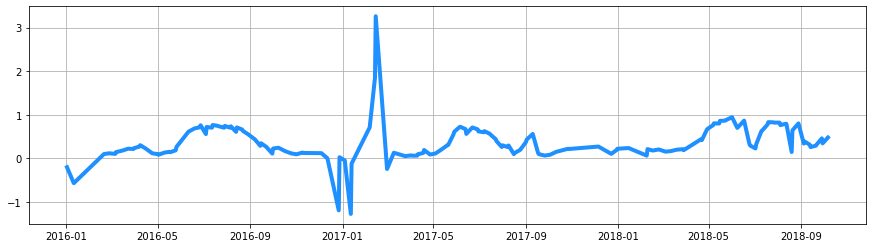

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4), sharex=False, sharey='col', # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});
ax.grid(True)

ax.plot(a_raw_field['human_system_start_time'], 
        a_raw_field[VI_idx], 
        linewidth=4, \
        color="dodgerblue", label="5-step smooth",
        linestyle="solid");

# 1. Remove Boundary Violaters

In [24]:
no_Outlier_TS = nc.interpolate_outliers_EVI_NDVI(outlier_input=a_raw_field, 
                                                 given_col=VI_idx)

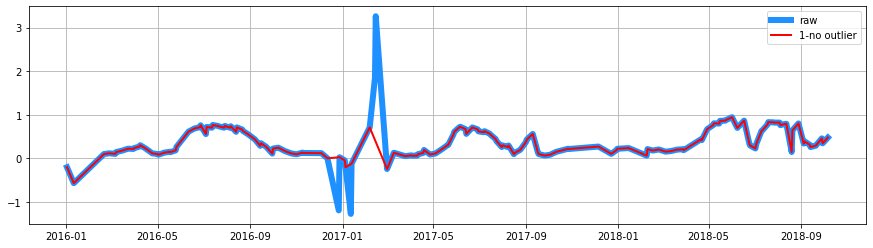

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4), sharex=False, sharey='col', # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});
ax.grid(True)


ax.plot(a_raw_field['human_system_start_time'], 
        a_raw_field[VI_idx], 
        linewidth=6, \
        color="dodgerblue", label="raw",
        linestyle="solid");

ax.plot(no_Outlier_TS['human_system_start_time'], 
        no_Outlier_TS[VI_idx], 
        linewidth=2, \
        color="red", label="1-no outlier",
        linestyle="solid");

ax.legend(loc="upper right");

# 2. Regularize